In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
import glob

In [2]:
def rename_images(img_path):
    images=glob.glob(img_path + "/*.jpg") 
    
    for img in images:
        head, tail = os.path.split(img)
        os.rename(img,head+'\__'+tail)


In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(56,56)
    for img in images:
        old_img=Image.open(img)
        #image height == target height skipp all process
        if old_img.width==target_size[0]:
            print('images is already resized, skipping all process')
            return

        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 가위
resize_images('.\\data\\scissor')
# 바위
resize_images('.\\data\\rock')
# 보
resize_images('.\\data\\paper')
# 테스트 데이터
# 가위
#resize_images('.\\data\\test\\scissor')
# 바위
#resize_images('.\\data\\test\\rock')
# 보
#resize_images('.\\data\\test\\paper')

300  images to be resized.
images is already resized, skipping all process
300  images to be resized.
images is already resized, skipping all process
300  images to be resized.
images is already resized, skipping all process


In [4]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=56
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


In [5]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return np.expand_dims(gray,2)


def load_data_gray(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=56
    color=1
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:]=rgb2gray(img)    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:]=rgb2gray(img)    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:]=rgb2gray(img)    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [6]:
# train data load
image_dir_path = '.\\data'
(train_data, train_label)=load_data_gray(image_dir_path,number_of_data=900)
train_data_norm = train_data/255.0   # 입력은 0~1 사이의 값으로 정규화

print("train_data_norm shape: {}".format(train_data_norm.shape))
print("train_label shape: {}".format(train_label.shape))

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = \
    train_test_split(train_data_norm, train_label, \
                     test_size=0.2, shuffle=True, \
                     stratify=train_label, random_state=34)


학습데이터(x_train)의 이미지 개수는 900 입니다.
train_data_norm shape: (900, 56, 56, 1)
train_label shape: (900,)


In [7]:
# x_test, y_test를 만드는 방법
image_dir_path = '.\\data/test'
(x_test, y_test)=load_data_gray(image_dir_path,number_of_data=300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test_norm shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test_norm shape: (300, 56, 56, 1)
y_test shape: (300,)


In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 바꿔 볼 수 있는 하이퍼파라미터들
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),padding='same', activation='relu', input_shape=(56,56,1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3),padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
#model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=256, activation='relu'))
#model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

adam = keras.optimizers.Adam()
print(adam.learning_rate)
model.compile(optimizer=adam,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

# 모델 훈련
history = model.fit(train_data_norm, train_label,validation_data=(x_valid,y_valid), epochs=14)


<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       295168    
______________________________________________________

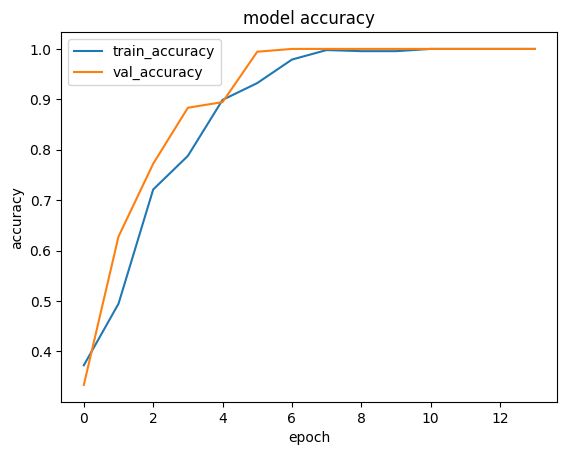

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

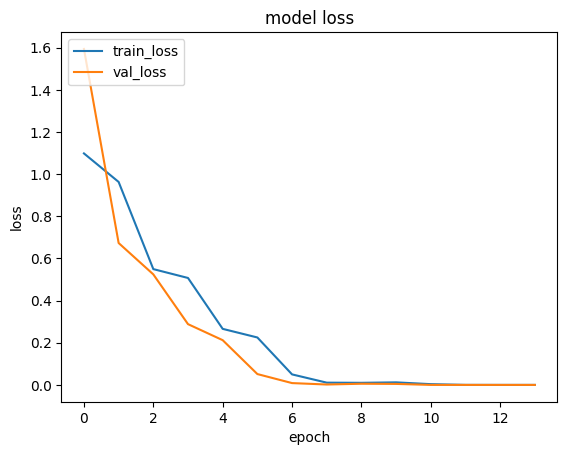

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

In [11]:
# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 - 1s - loss: 5.8698 - accuracy: 0.6533
test_loss: 5.869760990142822 
test_accuracy: 0.653333306312561
